In [58]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library import CDKMRippleCarryAdder
from qiskit.circuit.library import MCMT
from qiskit.circuit import Gate

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-07-20 20:20:53,971: Credentials are already in use. The existing account in the session will be replaced.


0100
0001
[0, 1, 0, 0]


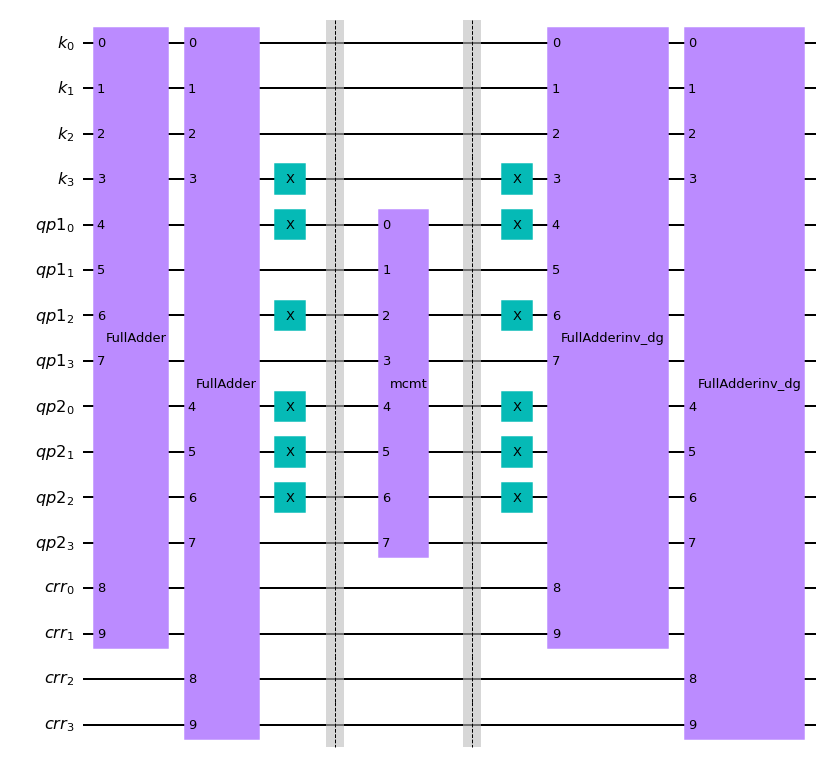

In [59]:
#Creating Oracle according to the Ciphertext

adder=CDKMRippleCarryAdder(4,'full','FullAdder')
adderinv=CDKMRippleCarryAdder(4,'full','FullAdderinv')
adderinv=adderinv.inverse()
qr1o = QuantumRegister(4, 'k')
qr2o = QuantumRegister(4,'qp1')
qr3o = QuantumRegister(4,'qp2')
caro=QuantumRegister(4,'crr')
oracle=circ = QuantumCircuit(qr1o,qr2o,qr3o,caro, name='oracle')
#oracle=QuantumCircuit(8,0, name='Oracle')
#Enter the hexadecimal in binary form
C_0 = 4 #Enter the decimal between 0 to 15 i.e. number representing the hexadecimal
C_1 = 1
C_0='{:04b}'.format(C_0) #To keep leading zeroes which gets deleted when converting a number to binary
#C_0=int(C_0)
print(C_0)
C_1='{:04b}'.format(C_1) #To keep leading zeroes
print(C_1)


arrt1=[int(d) for d in C_0] 
arr1=[int(d) for d in C_0] 
print(arrt1)

arrt2=[int(d) for d in C_1] 
arr2=[int(d) for d in C_1]

for i in range(len(arrt1)):
  #reversing the list
      arr1[i]=arrt1[len(arrt1)-i-1]

for i in range(len(arrt2)):
  #reversing the list
      arr2[i]=arrt2[len(arrt2)-i-1]
oracle.append(adder, [qr1o[0],qr1o[1], qr1o[2],qr1o[3],qr2o[0],qr2o[1],qr2o[2],qr2o[3],caro[0],caro[1]])
oracle.append(adder, [qr1o[0],qr1o[1], qr1o[2],qr1o[3],qr3o[0],qr3o[1],qr3o[2],qr3o[3],caro[2],caro[3]])
#circ.append(adder, [qr[1], qr[2]])
    
for i in range(4):
    if arr1[i]==0:
        oracle.x([i+3])
        
for i in range(4):
    if arr2[i]==0:
        oracle.x([i+7])
       

oracle.barrier()

cnz = MCMT('z', num_ctrl_qubits=7, num_target_qubits=1)
oracle.append(cnz, [qr2o[0],qr2o[1],qr2o[2],qr2o[3],qr3o[0],qr3o[1],qr3o[2],qr3o[3]]) #add cnz to the original qc

oracle.barrier()

for i in range(4):
    if arr1[i]==0:
        oracle.x([i+3])
        
for i in range(4):
    if arr2[i]==0:
        oracle.x([i+7])
        
oracle.append(adderinv, [qr1o[0],qr1o[1], qr1o[2],qr1o[3],qr2o[0],qr2o[1],qr2o[2],qr2o[3],caro[0],caro[1]])
oracle.append(adderinv, [qr1o[0],qr1o[1], qr1o[2],qr1o[3],qr3o[0],qr3o[1],qr3o[2],qr3o[3],caro[2],caro[3]])
        
oracle.draw()
    

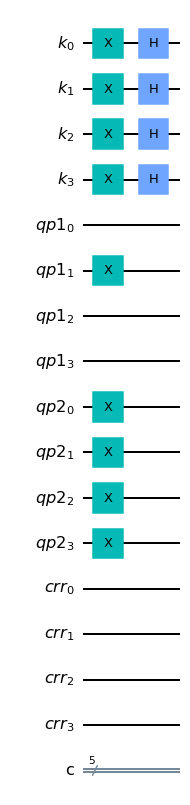

In [60]:
qr1 = QuantumRegister(4, 'k')
qr2 = QuantumRegister(4,'qp1')
qr3 = QuantumRegister(4,'qp2')
car=QuantumRegister(4,'crr')
cr= ClassicalRegister(5, 'c')
circ = QuantumCircuit(qr1,qr2,qr3,car,cr)
for i in range(4):
    circ.x(qr1[i])
for i in range(4):
    circ.h(qr1[i])
for i in range(4):
    circ.x(qr3[i])
#circ.x(qr1[2])
#circ.x(qr1[3])
circ.x(qr2[1])
#circ.append(adder, [qr1[0],qr1[1], qr1[2],qr1[3],qr2[0],qr2[1],qr2[2],qr2[3],car[0],car[1]])
#circ.append(adder, [qr1[0],qr1[1], qr1[2],qr1[3],qr3[0],qr3[1],qr3[2],qr3[3],car[2],car[3]])
#circ.append(adder, [qr[1], qr[2]])

#circ.measure(qr2[0:4] + [car[1]],cr)
#circ.draw('mpl')

circ.draw()

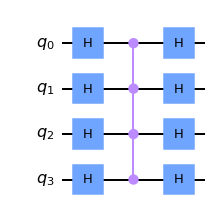

In [61]:
#Diffusion operator
diff=QuantumCircuit(4,0, name='diffuser')
for i in range(4):
    diff.h(i-1)
    
cnz2 = MCMT('z', num_ctrl_qubits=3, num_target_qubits=1)
diff=diff.compose(cnz2) #add cnz to the original qc

for i in range(4):
    diff.h(i-1)
    
    
diff.draw()


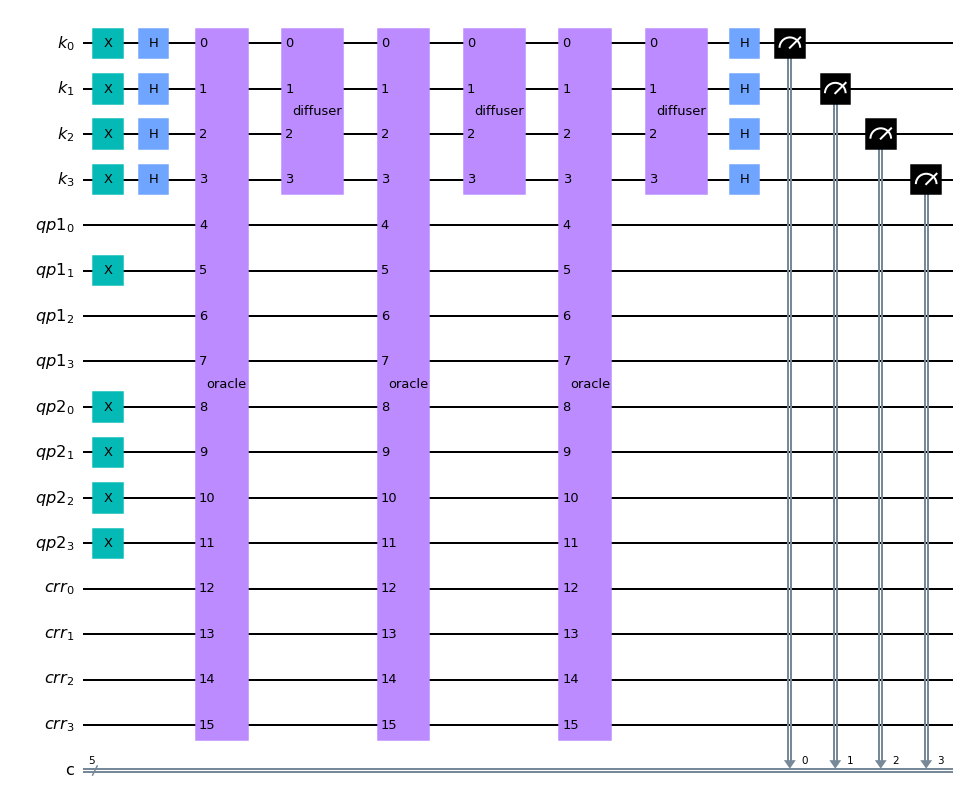

In [62]:
circ.append(oracle, [qr1o[0],qr1o[1], qr1o[2],qr1o[3],qr2o[0],qr2o[1],qr2o[2],qr2o[3],qr3o[0],qr3o[1],qr3o[2],qr3o[3],caro[0],caro[1],caro[2],caro[3]])
circ.append(diff,[qr1o[0],qr1o[1], qr1o[2],qr1o[3]])
circ.append(oracle, [qr1o[0],qr1o[1], qr1o[2],qr1o[3],qr2o[0],qr2o[1],qr2o[2],qr2o[3],qr3o[0],qr3o[1],qr3o[2],qr3o[3],caro[0],caro[1],caro[2],caro[3]])
circ.append(diff,[qr1o[0],qr1o[1], qr1o[2],qr1o[3]])
circ.append(oracle, [qr1o[0],qr1o[1], qr1o[2],qr1o[3],qr2o[0],qr2o[1],qr2o[2],qr2o[3],qr3o[0],qr3o[1],qr3o[2],qr3o[3],caro[0],caro[1],caro[2],caro[3]])
circ.append(diff,[qr1o[0],qr1o[1], qr1o[2],qr1o[3]])
for i in range(4):
    circ.h(qr1[i])
for i in range(4):
    circ.measure(qr1[i],i)
circ.draw()

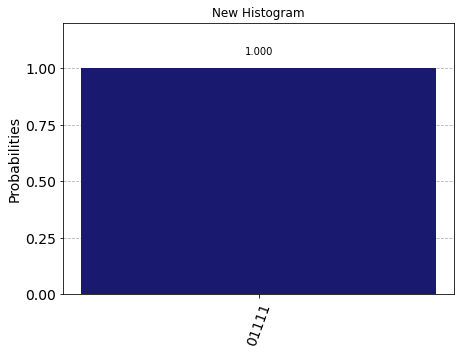

In [63]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="New Histogram")
